<a href="https://colab.research.google.com/github/zen4s/IK/blob/master/20240601_Behind_the_Hugginface_Transformers_pipeline_(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Behind the Hugginface Transformers pipeline (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "This would make a great breakfast. Add some figs to it and it will be the best ever.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998351335525513},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

#### This pipeline groups together three steps: preprocessing, passing the inputs through the model, and postprocessing:

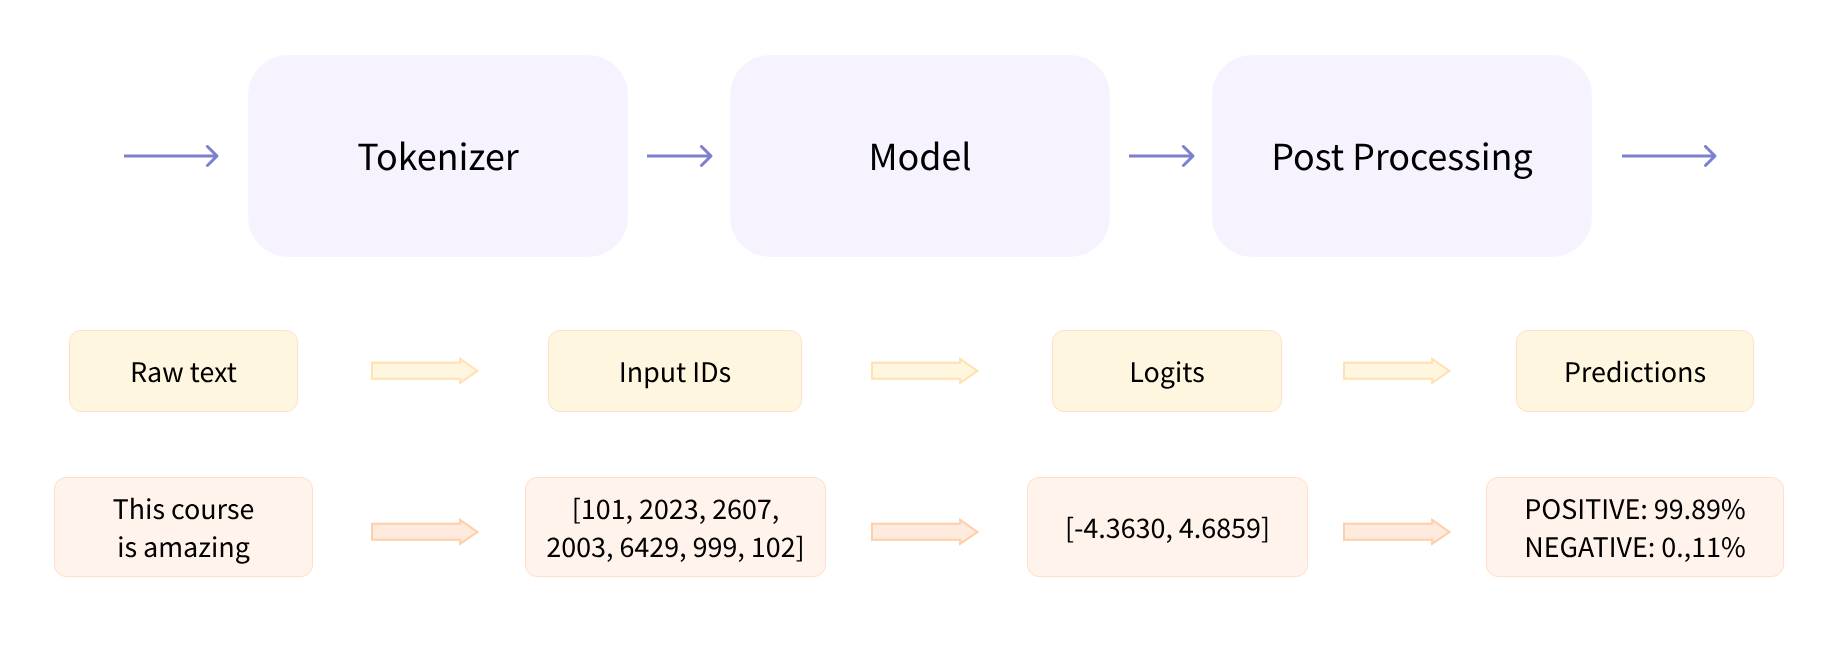

Preprocessing with a tokenizer
Like other neural networks, Transformer models can’t process raw text directly, so the first step of our pipeline is to convert the text inputs into numbers that the model can make sense of. To do this we use a tokenizer, which will be responsible for:

Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
Mapping each token to an integer
Adding additional inputs that may be useful to the model
All this preprocessing needs to be done in exactly the same way as when the model was pretrained, so we first need to download that information from the Model Hub (https://huggingface.co/models). To do this, we use the AutoTokenizer class and its from_pretrained() method. Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache it (so it’s only downloaded the first time you run the code below).

Since the default checkpoint of the sentiment-analysis pipeline is distilbert-base-uncased-finetuned-sst-2-english (you can see its model card here: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english ), we run the following:

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Once we have the tokenizer, we can directly pass our sentences to it and we’ll get back a dictionary that’s ready to feed to our model! The only thing left to do is to convert the list of input IDs to tensors.

You can use Huggingface Transformers without having to worry about which ML framework is used as a backend; it might be PyTorch or TensorFlow, or Flax for some models. However, Transformer models only accept tensors as input. If this is your first time hearing about tensors, you can think of them as NumPy arrays instead. A NumPy array can be a scalar (0D), a vector (1D), a matrix (2D), or have more dimensions. It’s effectively a tensor; other ML frameworks’ tensors behave similarly, and are usually as simple to instantiate as NumPy arrays.

To specify the type of tensors we want to get back (PyTorch, TensorFlow, or plain NumPy), we use the return_tensors argument:

In [ ]:
raw_inputs = [
    "This would make a great breakfast. Add some figs to it and it will be the best ever.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  2023,  2052,  2191,  1037,  2307,  6350,  1012,  5587,  2070,
         20965,  2015,  2000,  2009,  1998,  2009,  2097,  2022,  1996,  2190,
          2412,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


Don’t worry about padding and truncation just yet; we’ll explain those later. The main things to remember here are that you can pass one sentence or a list of sentences, as well as specifying the type of tensors you want to get back (if no type is passed, you will get a list of lists as a result).

Above is what the results look like as PyTorch tensors.

The output itself is a dictionary containing two keys, input_ids and attention_mask. input_ids contains two rows of integers (one for each sentence) that are the unique identifiers of the tokens in each sentence. We’ll explain what the attention_mask is later in this chapter.

## Going through the model

We can download our pretrained model the same way we did with our tokenizer. Hugginface Transformers provides an AutoModel class which also has a from_pretrained() method:

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In this code snippet, we have downloaded the same checkpoint we used in our pipeline before (it should actually have been cached already) and instantiated a model with it.

This architecture contains only the base Transformer module: given some inputs, it outputs what we’ll call hidden states, also known as features. For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model.

If this doesn’t make sense, don’t worry about it. We’ll explain it all later.

While these hidden states can be useful on their own, they’re usually inputs to another part of the model, known as the head. Different tasks could have been performed with the same architecture, but each of these tasks will have a different head associated with it.

### A high-dimensional vector?
The vector output by the Transformer module is usually large. It generally has three dimensions:  

Batch size: The number of sequences processed at a time (2 in our example).

Sequence length: The length of the numerical representation of the sequence (16 in our example).  

Hidden size: The vector dimension of each model input.  

It is said to be “high dimensional” because of the last value. The hidden size can be very large (768 is common for smaller models, and in larger models this can reach 3072 or more).

We can see this if we feed the inputs we preprocessed to our model:



In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 23, 768])


Note that the outputs of Hugginface Transformers models behave like namedtuples or dictionaries. You can access the elements by attributes (like we did) or by key (outputs["last_hidden_state"]), or even by index if you know exactly where the thing you are looking for is (outputs[0]).

## Model heads: Making sense out of numbers
The model heads take the high-dimensional vector of hidden states as input and project them onto a different dimension. They are usually composed of one or a few linear layers:

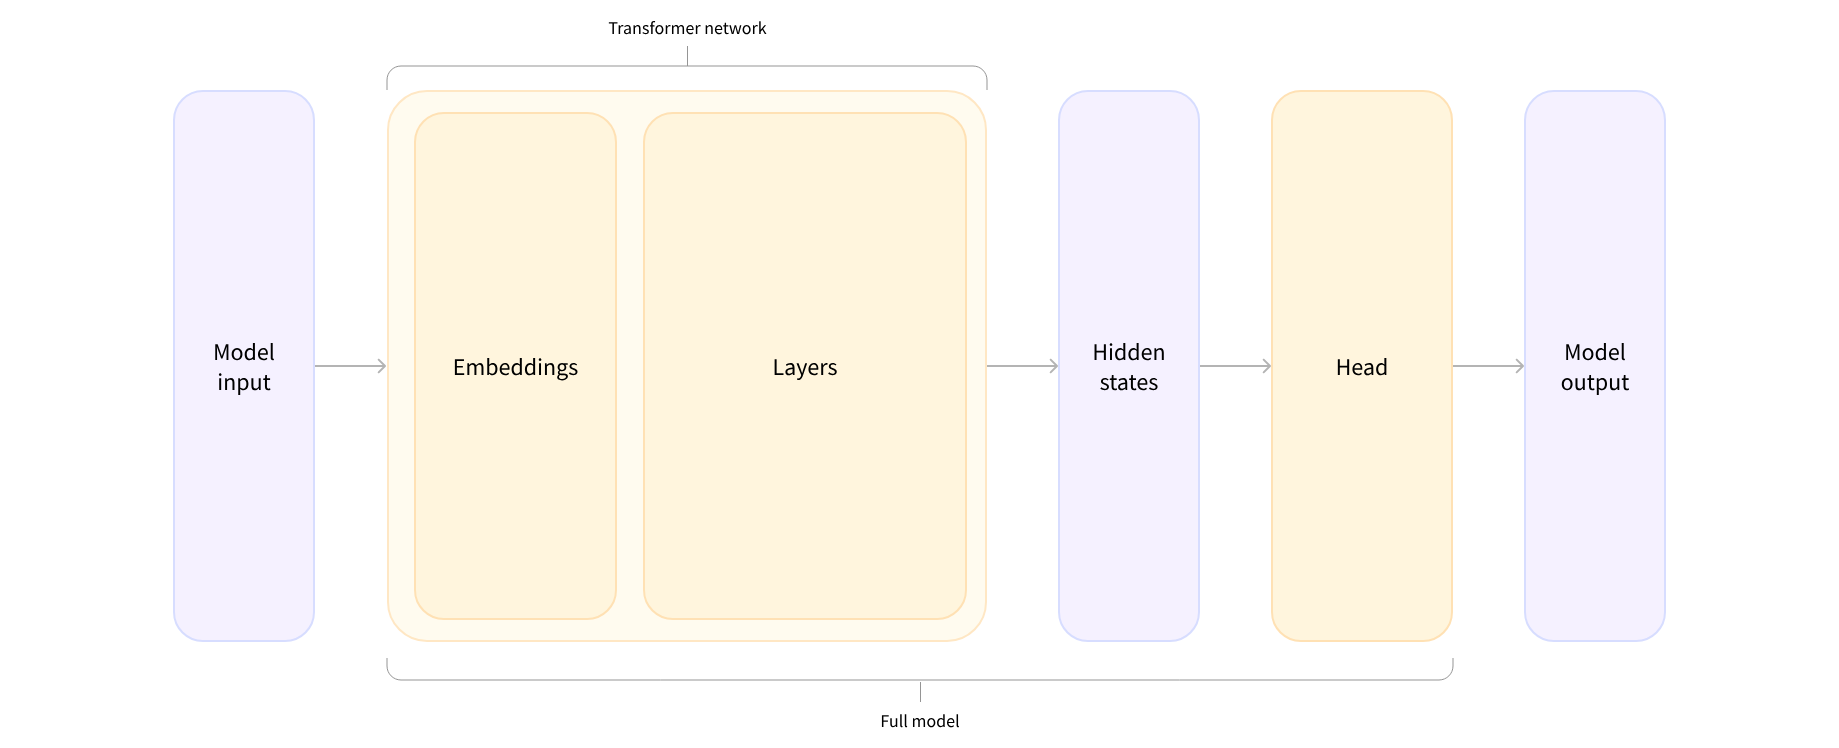

The output of the Transformer model is sent directly to the model head to be processed.

In this diagram, the model is represented by its embeddings layer and the subsequent layers. The embeddings layer converts each input ID in the tokenized input into a vector that represents the associated token. The subsequent layers manipulate those vectors using the attention mechanism to produce the final representation of the sentences.

There are many different architectures available in Hugginface Transformers, with each one designed around tackling a specific task. Here is a non-exhaustive list:

* Model (retrieve the hidden states)
* ForCausalLM
* ForMaskedLM
* ForMultipleChoice
* ForQuestionAnswering
* ForSequenceClassification
* ForTokenClassification  
and others  

For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the AutoModel class, but AutoModelForSequenceClassification:



In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

Now if we look at the shape of our outputs, the dimensionality will be much lower: the model head takes as input the high-dimensional vectors we saw before, and outputs vectors containing two values (one per label):

In [ ]:
print(outputs.logits.shape)

torch.Size([2, 2])


Since we have just two sentences and two labels, the result we get from our model is of shape 2 x 2.

## Postprocessing the output

The values we get as output from our model don’t necessarily make sense by themselves. Let’s take a look:

In [ ]:
print(outputs.logits)

tensor([[-4.2052,  4.5049],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


Our model predicted [-4.2052,  4.5049] for the first sentence and [ 4.1692, -3.3464] for the second one. Those are not probabilities but logits, the raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer (all Huggingface Transformers models output the logits, as the loss function for training will generally fuse the last activation function, such as SoftMax, with the actual loss function, such as cross entropy):

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[1.6488e-04, 9.9984e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


These are recognizable probability scores.

To get the labels corresponding to each position, we can inspect the id2label attribute of the model config:

In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}